In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


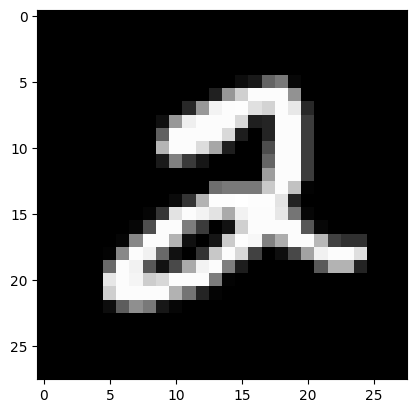

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[5], cmap = 'gray')
plt.show()

In [4]:
X_train = X_train.astype ('float32') / 255
X_test = X_test.astype ('float32') / 255

In [5]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5,5), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 79s 159ms/step - loss: 0.1567 - accuracy: 0.9528 - val_loss: 0.2048 - val_accuracy: 0.9435
Epoch 2/10
469/469 [==============================] - 70s 149ms/step - loss: 0.0527 - accuracy: 0.9843 - val_loss: 0.0297 - val_accuracy: 0.9904
Epoch 3/10
469/469 [==============================] - 70s 149ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0354 - val_accuracy: 0.9882
Epoch 4/10
469/469 [==============================] - 68s 145ms/step - loss: 0.0300 - accuracy: 0.9913 - val_loss: 0.0280 - val_accuracy: 0.9910
Epoch 5/10
469/469 [==============================] - 71s 152ms/step - loss: 0.0244 - accuracy: 0.9919 - val_loss: 0.0276 - val_accuracy: 0.9914
Epoch 6/10
469/469 [==============================] - 68s 144ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0279 - val_accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 66s 141ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0255 - val_ac

In [10]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)
print(test_acc)

0.9915000200271606


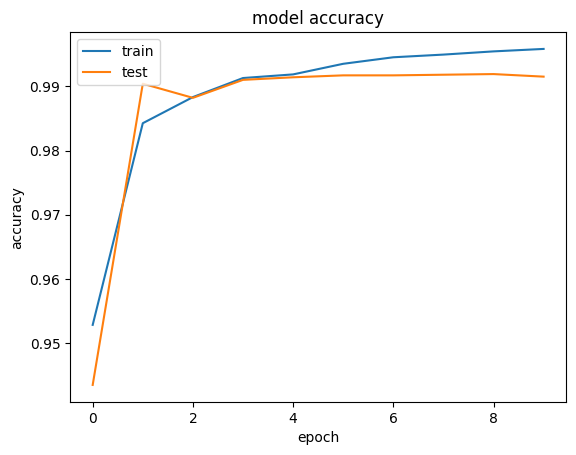

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

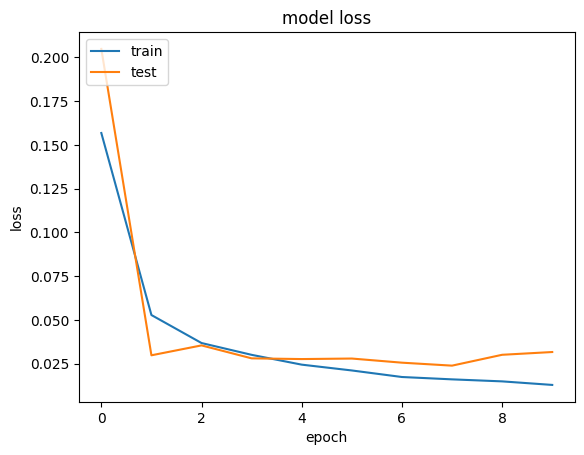

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()